In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Read in data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_train_digit(num):
    print(Y_train[num])
    label = Y_train[num].argmax(axis=0)
    image = X_train[num].reshape([28,28])
    plt.title('TRAINING Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_test_digit(num):
    print(Y_test[num])
    label = Y_test[num].argmax(axis=0)
    image = X_test[num].reshape([28,28])
    plt.title('TESTING Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


In [4]:
# Define parameters for the model
X_train, Y_train = TRAIN_SIZE(5500)
X_test, Y_test = TEST_SIZE(1000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (1000, 784)
y_test Examples Loaded = (1000, 10)


In [5]:
# === THE MODEL ===

# n features, k classes
in_dim = 784
hid_dim= 25
out_dim = 10

# Create placeholders for features and labels
X = tf.placeholder(tf.float32, [None, in_dim])
y = tf.placeholder(tf.float32, [None, out_dim])

# Layer 1
W1 = tf.get_variable('W1', [in_dim,hid_dim], initializer=tf.random_normal_initializer())
b1 = tf.get_variable('b1',[1,hid_dim], initializer=tf.random_normal_initializer())
h1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

# Layer 2
W2 = tf.get_variable('W2', [hid_dim,out_dim], initializer=tf.random_normal_initializer())
b2 = tf.get_variable('b2',[1,out_dim], initializer=tf.random_normal_initializer())
h2 = tf.nn.softmax(tf.matmul(h1, W2) + b2)

# output
h = h2

# For training: loss and trainer
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(h), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# For testing: accuracy
prediction = tf.argmax(h,1)
correct_prediction = tf.equal(prediction, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
# Launch the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for i in range(10000):
    sess.run(train_step, feed_dict={X: X_train, y: Y_train})
    if ((i+1)%1000 == 0):
        print('After training step : ', i+1)
        print('Accuracy            : ', sess.run(accuracy, feed_dict={X: X_test, y: Y_test}))

After training step :  1000
Accuracy            :  0.224
After training step :  2000
Accuracy            :  0.355
After training step :  3000
Accuracy            :  0.441
After training step :  4000
Accuracy            :  0.516
After training step :  5000
Accuracy            :  0.565
After training step :  6000
Accuracy            :  0.593
After training step :  7000
Accuracy            :  0.619
After training step :  8000
Accuracy            :  0.63
After training step :  9000
Accuracy            :  0.64
After training step :  10000
Accuracy            :  0.65


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


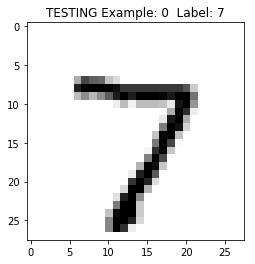

Prediction:  7
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


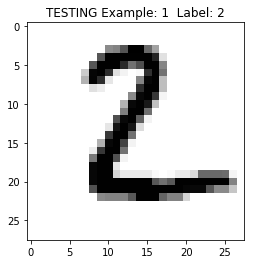

Prediction:  2
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


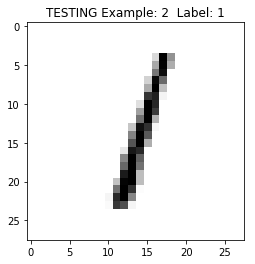

Prediction:  1
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


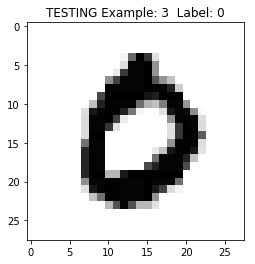

Prediction:  0
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


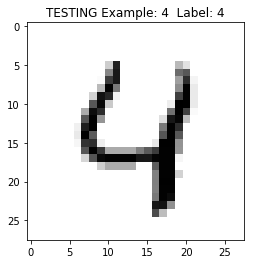

Prediction:  4
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


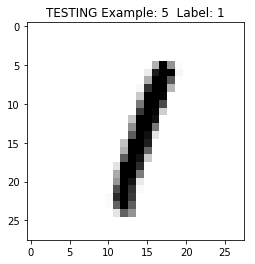

Prediction:  1
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


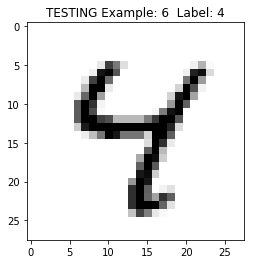

Prediction:  4
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


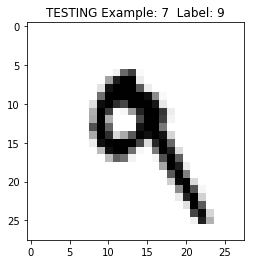

Prediction:  9
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


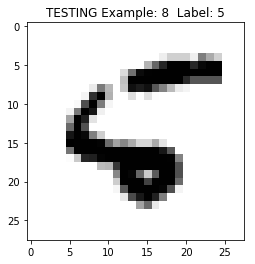

Prediction:  2
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


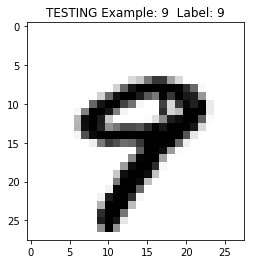

Prediction:  9


In [7]:
# Show some predictions
Prediction = sess.run(prediction, feed_dict={X: X_test, y: Y_test})
for i in range(10):
    display_test_digit(i)
    print('Prediction: ', Prediction[i])
    print('=================')
sess.close()